# Final Mini Project Report: Music Genre Classification

#### Michael Miceli, Kaden Franklin, Scott Brown, Ty Hawkes

## Introduction
Around 120,000 new music tracks are uploaded to streaming services every day. Due to the increasingly high number of songs produced now days, it is time consuming and expensive for humans to listen to each song and classify its genre. Classifying new tracks into correct genres allows streaming services to recommend these tracks to audiences that are more likely to enjoy them. In this project, we aim to develop a predictive model that can take an audio sample, and accurately classify it's genre without the need of a human ear.

## Exploratory Data Analysis

In [10]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# Import data
df_3 = pd.read_csv('data/features_3_sec.csv')
df_30 = pd.read_csv('data/features_30_sec.csv')

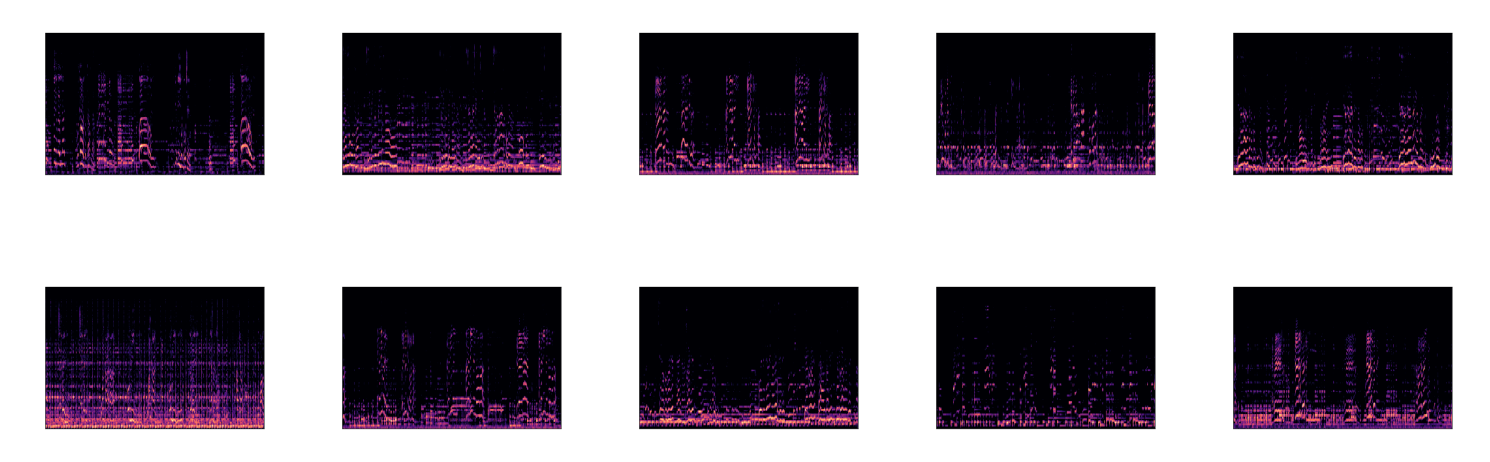

In [11]:
# Path to the directory containing images
directory_path = "data/images_original/blues/"

image_files = [f for f in os.listdir(directory_path) if f.endswith('.png')]

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 6))

axes = axes.flatten()

for ax, image_file in zip(axes, image_files[:10]):
    # Load the image
    image = mpimg.imread(os.path.join(directory_path, image_file))
    
    # Display the image
    ax.imshow(image)
    ax.axis('off')  # Turn off axis numbers and ticks

plt.tight_layout()
plt.show()

## Methods

### Feature Engineering

**Compression Reduction** - We compressed each audio file using FLAC lossless compression and then recorded the percent reduction of file size for each file. We believed this would help identify music genres if some genres were more repetative than others. Our EDA showed that Classical and Jazz had the highest average file size reductions, while pop had the lowest average file size reductions.

### All Models 

**Random Forest**  
&emsp;**Description**  
&emsp; - Ensemble learning method that builds multiple decision trees to classify its input.  
&emsp;**Key Hyper Parameters**  
&emsp;- n_estimators: Number of decision tree to build  
&emsp;- max_depth: Maximum depth allowed for each tree  
&emsp;- min_samples_split: Minimum number of observations allowed in a node to allow a split  
&emsp;- min_samples_leaf: Minimum number of observations allowed in a leaf node of a tree.  
&emsp;**Results**  
&emsp;- 72% accuracy. Had the hardest time classifying Reggae and Jazz.

**K Nearest Neighbors**  
&emsp;**Description**  
&emsp; - Simple, non-parametric algorithm that predicts labels based on the majority vote of it's K nearest neighbors in the feature space.  
&emsp;**Hyper Parameters**  
&emsp;- n_neighbors: Number of neighbors involved in vote ranked by their closeness in proximity.  
&emsp;- weights (uniform, distance): Determines the weight of each vote based on their rank.  
&emsp;- metric: Determines how distance is calculated.  
&emsp;**Results**  
&emsp;- 68% accuracy. Struggled to classify reggae.

**Support Vector Machines**  
&emsp;**Description**  
&emsp; - Simple algorithm that finds the optimal hyperplane that maximizes the margin between different classes in feature space.  
&emsp;**Hyper Parameters**  
&emsp;- C: Regularization parameter (Higher C leads to overfitting)  
&emsp;- kernel (linear, rbf, poly): Determines the kind of shape that the decision boundary can follow.  
&emsp;- gamma (scale, auto): Determines how many datapoints are considered when determining the optimal boundary  
&emsp;**Results**  
&emsp;- 69% accuracy. Had a hard time classifying Rock and Disco

**Light GBM**  
&emsp;**Description**  
&emsp; - Ensemble learning method that builds multiple weak decision trees sequentially on the residuals of the previous decision tree's predictions.  
&emsp;**Key Hyper Parameters**  
&emsp;- n_estimators: Number of decision tree to build.  
&emsp;- max_depth: Maximum depth allowed for each tree.  
&emsp;- learning_rate: The speed at which the model corrects it's previous errors.  
&emsp;- num_leaves: The maximum number of leaves allowed in a tree.  
&emsp;**Results**  
&emsp;- 69% accuracy. Had the hardest time classifying Disco and Rock.

**Convolutional Neural Network**  
&emsp;**Description**  
&emsp;- Deep learning model primarily used for analyzing visual imagery (in our case, spectrograms).  
&emsp;**Hyper Parameters**  
&emsp;- Learning Rate: Adjusts the amount by which weights are changed from epoch to epoch.  
&emsp;**Results**  
&emsp;- 61% accuracy. 

**Transformers**  
&emsp;**Description**  
&emsp; - Deep learning artichtecture that relies on self-attention mechanisms to process sequences of data.  
&emsp;**Hyper Parameters**  
&emsp;- Learning Rate: Adjusts the amount by which weights are changed from epoch to epoch.  
&emsp;- Batch Size: number of samples processed before weights are updated.  
&emsp;- Additional hyperparameters include validation split, image size, n epochs, transformer layers, patch size, projection dim, num heads, transformer units, mlp head units.  
&emsp;**Results**  
&emsp;- 20% accuracy. We achieved slightly better than random guessing, but generally did not find success with this model. 

## Model Selection

### Patterns
To our surprise, we observed that the traditional machine learning methods on tabular data performed better than our deep learning models. Our traditional methods saw an accuracy around 70% compared to the 61% accuracy of our CNN and 20% accuracy of our transformer. Additionally, each traditional machine learning method yielded a very similar accuracy despite the large differences in their algorithms. Lastly, we did not expect the random forest to outperform our gradient boosted tree ensemble method. 

### Pit-falls
Though we did not experience much trouble with traditional methods, we struggled to do better than random guessing with our transformer, and struggled to achieve a similar accuracy to the traditional methods using our CNN. It was difficult to find appropriate hyperparameters for our transformer model, and it was generally slow to train compared to other deep learning algorithms with a similar amount of layers. For our CNN model, it started to overfit quickly to our training data, leading to a stagnant validation accuracy around 60%.

### Possible Explanations for Poor Model Performance
**Transformer** - We believe this model underperformed due to our lack of understanding/experience implementing transformers, and to our lack of training data. We only had 100 spectrograms per category which is very small for a deep learning model to perform well.  
**CNN** - Like with the transformer model, we believe we lacked sufficient training data for this model to generalize well. It began to overfit very quickly and we could not prevent that.

## Best Model


## Conclusion & Next Steps